In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

sns.set()

In [2]:
A = [np.arange(10) for _ in range(10)]
for v in A:
    np.random.shuffle(v)

A = np.column_stack(A)
A

array([[1, 0, 5, 6, 8, 2, 9, 5, 1, 3],
       [2, 3, 7, 3, 7, 1, 6, 0, 0, 4],
       [9, 2, 3, 2, 0, 7, 4, 8, 3, 8],
       [8, 1, 8, 9, 5, 3, 1, 4, 8, 1],
       [0, 7, 1, 7, 6, 9, 3, 7, 6, 5],
       [4, 5, 6, 8, 4, 5, 5, 1, 7, 2],
       [3, 8, 2, 0, 1, 6, 0, 2, 2, 6],
       [6, 9, 4, 4, 3, 4, 7, 9, 9, 9],
       [7, 6, 9, 1, 9, 0, 8, 3, 5, 0],
       [5, 4, 0, 5, 2, 8, 2, 6, 4, 7]])

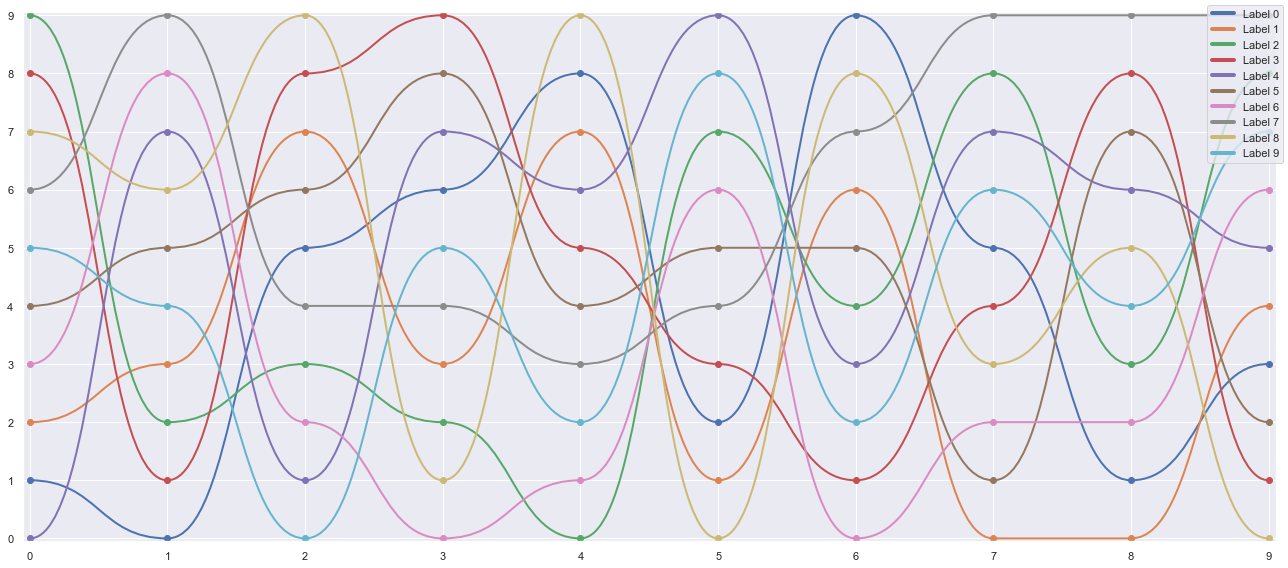

In [19]:
Path = mpath.Path

fig, ax = plt.subplots()

# расстояние влево или вправо от точки
# для правельного сетапа кривых
DELTA = 0.5

pallete = sns.palettes.color_palette(n_colors=A.shape[0])

legend_lines = []
legend_labels = []

for row in range(A.shape[0]):
    vert = []
    ops = []
    for col in range(A.shape[1]):
        rank = A[row, col]

        ax.plot(col, rank, color=pallete[row], markersize=12, marker='.')

        if col == 0:
            vert.append((0, rank))
            ops.append(Path.MOVETO)
            continue

        vert.append((col - 1 + DELTA, A[row, col - 1]))
        ops.append(Path.CURVE4)

        vert.append((col - DELTA, rank))
        ops.append(Path.CURVE4)

        vert.append((col, rank))
        ops.append(Path.CURVE4)

    legend_lines.append(
        matplotlib.lines.Line2D([0], [0], color=pallete[row], lw=4))
    legend_labels.append('Label ' + str(row))

    pp = mpatches.PathPatch(
        Path(vert, ops),
        transform=ax.transData,
        fc='none',
        ec=pallete[row],
        linewidth=2)

    ax.add_patch(pp)

ax.set_xlim(-0.05, A.shape[1] - 1 + 0.05)
plt.xticks(np.arange(0, A.shape[1], 1.0))
ax.set_ylim(-0.05, A.shape[0] - 1 + 0.05)
plt.yticks(np.arange(0, A.shape[0], 1.0))

fig.legend(legend_lines, legend_labels)

fig.tight_layout(rect=[0, 0, 3, 2])
